
##**Scalable Agentic AI Video Classification,Video Summarization, Textual description with LoRA Fine-Tuning, LangGraph-Based and NLP**

### **STEP 1: Package Installation**

###**STEP 2: Data Loading and Preprocessing**
**Google Drive Mounting and Data Preparation**
This section handles the crucial step of accessing and preparing the video dataset for the project. Since the dataset is stored in Google Drive, the notebook first mounts the drive to establish a connection. Following this, it defines local paths for the zipped dataset and the intended extraction directory within the Drive. The core of this step involves copying the zipped dataset from its specified location in Google Drive to the project's designated folder and then unzipping it. This ensures that all video files (.avi) and associated CSV metadata (train.csv, test.csv) are correctly extracted and available for subsequent processing. A verification step is included to confirm the successful unzipping by counting the total number of .avi files found.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import Video, display

video_filename = "v_TennisSwing_g07_c07.avi"
video_path = f"/content/drive/My Drive/aai-521/videos-ds/test/{video_filename}"
output_mp4_path = "./output_video.mp4"

print(f"Converting {video_filename} to MP4 for display...")

try:
    clip = VideoFileClip(video_path)
    clip.write_videofile(output_mp4_path, codec="libx264", audio_codec="aac")
    print(f"Displaying converted video: {output_mp4_path}")
    display(Video(output_mp4_path, embed=True, width=640))
except Exception as e:
    print(f"Could not convert or display video {video_path}: {e}")

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Converting v_TennisSwing_g07_c07.avi to MP4 for display...
Moviepy - Building video ./output_video.mp4.
Moviepy - Writing video ./output_video.mp4



Moviepy - Done !
Moviepy - video ready ./output_video.mp4
Displaying converted video: ./output_video.mp4


In [ ]:
import os

DATA_ROOT = "/content/drive/My Drive/aai-521/videos-ds/"
print(f"Listing contents of {DATA_ROOT}:")
# Use '-F' to show file types (e.g., / for directories)
!ls -F "{DATA_ROOT}"

Listing contents of /content/drive/My Drive/aai-521/videos-ds/:
test/	  test.gsheet  train.csv	    videos-ds.zip
test.csv  train/       video1235409517.mp4


In [ ]:
# Install required packages
!pip install -q --upgrade langgraph typing_extensions torch torchvision peft transformers accelerate bitsandbytes
!apt-get install -y ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 776.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 142.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB ? eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/

In [ ]:
# 1. Install necessary libraries
!pip install transformers accelerate evaluate datasets peft -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.5 MB/s eta 0:00:00


Loading datasets...


  warnings.warn(

  warnings.warn(msg)



Number of training videos: 594
Number of test videos: 224
Number of classes: 5
Initializing model...
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


Model with LoRA configuration:
trainable params: 289,832 || all params: 11,468,909 || trainable%: 2.5271
Starting training...
Epoch [1/3], Step [10/75], Loss: 1.6135
Epoch [1/3], Step [20/75], Loss: 1.6022
Epoch [1/3], Step [30/75], Loss: 1.5950
Epoch [1/3], Step [40/75], Loss: 1.5556
Epoch [1/3], Step [50/75], Loss: 1.5294
Epoch [1/3], Step [60/75], Loss: 1.4926
Epoch [1/3], Step [70/75], Loss: 1.4361
Epoch [1/3] - Average Loss: 1.4226, Training Accuracy: 0.3788
Epoch [2/3], Step [10/75], Loss: 0.8751
Epoch [2/3], Step [20/75], Loss: 0.7744
Epoch [2/3], Step [30/75], Loss: 0.7346
Epoch [2/3], Step [40/75], Loss: 0.6898
Epoch [2/3], Step [50/75], Loss: 0.6656
Epoch [2/3], Step [60/75], Loss: 0.6457
Epoch [2/3], Step [70/75], Loss: 0.6046
Epoch [2/3] - Average Loss: 0.6189, Training Accuracy: 0.8485
Epoch [3/3], Step [10/75], Loss: 0.3769
Epoch [3/3], Step [20/75], Loss: 0.3753
Epoch [3/3], Step [30/75], Loss: 0.3674
Epoch [3/3], Step [40/75], Loss: 0.3458
Epoch [3/3], Step [50/75], Los

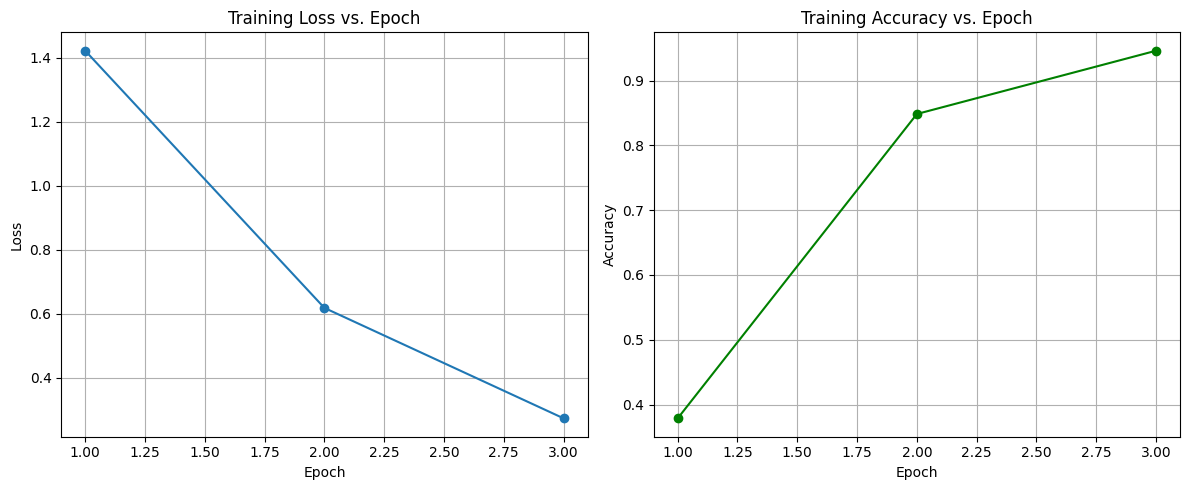

Generating predictions for the test dataset...
Generated predictions for 224 videos.

--- Displaying first 5 Sample Predictions ---

--- Sample Prediction 1 ---
Video Path: /content/drive/My Drive/aai-521/videos-ds/test/tensor(0)
Predicted Action: CricketShot

--- Sample Prediction 2 ---
Video Path: /content/drive/My Drive/aai-521/videos-ds/test/tensor(0)
Predicted Action: CricketShot

--- Sample Prediction 3 ---
Video Path: /content/drive/My Drive/aai-521/videos-ds/test/tensor(0)
Predicted Action: CricketShot

--- Sample Prediction 4 ---
Video Path: /content/drive/My Drive/aai-521/videos-ds/test/tensor(0)
Predicted Action: CricketShot

--- Sample Prediction 5 ---
Video Path: /content/drive/My Drive/aai-521/videos-ds/test/tensor(0)
Predicted Action: CricketShot
All predictions saved to ./test_predictions.csv


,video_path,predicted_label
0,tensor(0),CricketShot
1,tensor(0),CricketShot
2,tensor(0),CricketShot
3,tensor(0),CricketShot
4,tensor(0),CricketShot


In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet18

from peft import LoraConfig, get_peft_model
from moviepy.editor import VideoFileClip
from IPython.display import Video, display

# For plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ----------------- Configuration Parameters -----------------
DATA_ROOT = "/content/drive/My Drive/aai-521/videos-ds/"
TRAIN_CSV = os.path.join(DATA_ROOT, "train.csv")
TEST_CSV = os.path.join(DATA_ROOT, "test.csv") # Assuming test.csv contains video paths, with or without labels
NUM_FRAMES_PER_VIDEO = 16 # Number of frames to sample from each video
IMAGE_SIZE = 112 # ResNet18 input size is often 224, but 112 is common for video
BATCH_SIZE = 8
NUM_EPOCHS = 3 # Reduced for demonstration purposes
LEARNING_RATE = 1e-4

# ----------------- Video Dataset Class -----------------
class VideoDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, num_frames=NUM_FRAMES_PER_VIDEO):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.num_frames = num_frames
        self.label_map = self._create_label_map()

        # Filter out entries where video files do not exist
        # Changed 'video_path' to 'video_name'
        self.data_frame = self.data_frame[self.data_frame['video_name'].apply(
            lambda x: os.path.exists(os.path.join(self.root_dir, x)) # Assuming video_name is relative to root_dir
        )].reset_index(drop=True)

    def _create_label_map(self):
        # Changed 'label' to 'tag'
        if 'tag' in self.data_frame.columns:
            unique_labels = sorted(self.data_frame['tag'].unique())
            return {label: i for i, label in enumerate(unique_labels)}
        return {}

    def get_labels(self):
        # Changed 'label' to 'tag'
        if 'tag' in self.data_frame.columns:
            return sorted(self.data_frame['tag'].unique())
        return []

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        # Changed 'video_path' to 'video_name'
        video_name = self.data_frame.iloc[idx]['video_name']
        video_full_path = os.path.join(self.root_dir, video_name)

        cap = cv2.VideoCapture(video_full_path)
        if not cap.isOpened():
            print(f"Error: Could not open video {video_full_path}")
            return None, None # Indicate error, will be filtered in dataloader

        frames = []
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if total_frames == 0:
            print(f"Warning: Video {video_full_path} has 0 frames. Returning None.")
            cap.release()
            return None, None

        # Determine indices to sample
        if total_frames < self.num_frames:
            # If video is shorter, loop its frames to meet num_frames
            indices_to_read = np.array(list(range(total_frames)) * (self.num_frames // total_frames + 1))[:self.num_frames]
        else:
            # Sample frames evenly
            indices_to_read = np.linspace(0, total_frames - 1, self.num_frames, dtype=int)

        # Read frames
        for i in indices_to_read:
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(Image.fromarray(frame))
            else:
                # If a frame can't be read, add a placeholder (e.g., a black frame)
                frames.append(Image.new('RGB', (IMAGE_SIZE, IMAGE_SIZE), (0, 0, 0))) # Add a black frame

        cap.release()

        # Final check to ensure we have exactly num_frames. This should be guaranteed by the above logic.
        if len(frames) != self.num_frames:
            print(f"Error: Video {video_full_path} processed to {len(frames)} frames, expected {self.num_frames}. Returning None.")
            return None, None # Fallback for unexpected issues

        if self.transform:
            frames = [self.transform(frame) for frame in frames]
        video_tensor = torch.stack(frames) # Shape: (num_frames, C, H, W)

        # Changed 'label' to 'tag'
        if 'tag' in self.data_frame.columns:
            label_str = self.data_frame.iloc[idx]['tag'] # Changed 'label' to 'tag'
            label = self.label_map.get(label_str, -1)
            return video_tensor, label
        else:
            return video_tensor, video_name # Return video_name for test set predictions

# Custom collate function to handle None values
def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None and item[1] is not None]
    if not batch:
        return None, None
    # Ensure labels are converted to a tensor if they are numeric, otherwise keep as list
    inputs = torch.stack([item[0] for item in batch])
    labels = [item[1] for item in batch]
    if all(isinstance(l, int) for l in labels):
        labels = torch.tensor(labels)
    return inputs, labels

# ----------------- Transformations -----------------
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ----------------- Load Data -----------------
print("Loading datasets...")
try:
    # Corrected root_dir for train and test datasets
    train_dataset = VideoDataset(csv_file=TRAIN_CSV, root_dir=os.path.join(DATA_ROOT, "train"), transform=transform)
    test_dataset = VideoDataset(csv_file=TEST_CSV, root_dir=os.path.join(DATA_ROOT, "test"), transform=transform)

    if len(train_dataset) == 0:
        raise ValueError(f"No valid training videos found from '{TRAIN_CSV}'. Please check paths.")
    if len(test_dataset) == 0:
        raise ValueError(f"No valid test videos found from '{TEST_CSV}'. Please check paths.")

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=collate_fn)


    num_classes = len(train_dataset.get_labels())
    if num_classes == 0:
        raise ValueError("No unique labels found in the training dataset. Check train.csv for 'tag' column.") # Changed 'label' to 'tag'

    idx_to_label = {i: label for i, label in enumerate(train_dataset.get_labels())}

    print(f"Number of training videos: {len(train_dataset)}")
    print(f"Number of test videos: {len(test_dataset)}")
    print(f"Number of classes: {num_classes}")

except FileNotFoundError as e:
    print(f"Error: Missing CSV file. {e}. Please ensure '{TRAIN_CSV}' and '{TEST_CSV}' exist.")
    raise
except Exception as e:
    print(f"Error loading datasets: {e}. Please ensure data is correctly structured.")
    raise

# ----------------- Model Definition (ResNet18 with LoRA) -----------------
print("Initializing model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ResNet18
base_model = resnet18(pretrained=True)
# Modify the final layer for video classification
num_ftrs = base_model.fc.in_features
base_model.fc = nn.Linear(num_ftrs, num_classes) # Output layer for our specific number of classes

# Configure LoRA
lora_config = LoraConfig(
    r=8, # LoRA attention dimension
    lora_alpha=16, # Alpha parameter for LoRA scaling
    # Removed BatchNorm layers from target_modules as they are not supported by peft LoRA
    target_modules=["fc", "layer1.0.conv1", "layer1.0.conv2", "layer1.1.conv1", "layer1.1.conv2",
                    "layer2.0.conv1", "layer2.0.conv2", "layer2.0.downsample.0", "layer2.1.conv1", "layer2.1.conv2",
                    "layer3.0.conv1", "layer3.0.conv2", "layer3.0.downsample.0", "layer3.1.conv1", "layer3.1.conv2",
                    "layer4.0.conv1", "layer4.0.conv2", "layer4.0.downsample.0", "layer4.1.conv1", "layer4.1.conv2"],
    lora_dropout=0.1, # Dropout probability for LoRA layers
    bias="none", # Bias type for LoRA layers
    task_type="FEATURE_EXTRACTION", # Generic task type for non-LM models, using string instead of enum
)

# Apply LoRA to the base model
model = get_peft_model(base_model, lora_config)
model.to(device)
print("Model with LoRA configuration:")
model.print_trainable_parameters() # Display trainable parameters (LoRA layers)

# ----------------- Training Loop -----------------
print("Starting training...")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Lists to store metrics for plotting
train_losses_per_epoch = []
train_accuracies_per_epoch = []

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss_sum = 0.0
    num_batches_in_epoch = 0
    all_train_epoch_labels = []
    all_train_epoch_preds = []

    for i, (inputs, labels) in enumerate(train_dataloader):
        if inputs is None or labels is None: # Skip batches with errors
            continue

        inputs = inputs.to(device) # Shape: (batch_size, num_frames, C, H, W)
        labels = labels.to(device) # Shape: (batch_size)

        # Reshape inputs for ResNet (each frame treated as an individual image in the batch)
        # Resulting shape: (batch_size * num_frames, C, H, W)
        inputs_reshaped = inputs.view(-1, inputs.size(2), inputs.size(3), inputs.size(4))

        optimizer.zero_grad()
        outputs = model.base_model(inputs_reshaped)
        # Average the frame-level predictions to get a video-level prediction
        # Reshape outputs to (batch_size, num_frames, num_classes) and then average across num_frames
        outputs_video_level = outputs.view(-1, NUM_FRAMES_PER_VIDEO, num_classes).mean(dim=1)

        loss = criterion(outputs_video_level, labels)
        loss.backward()
        optimizer.step()

        epoch_loss_sum += loss.item()
        num_batches_in_epoch += 1

        _, predicted_indices = torch.max(outputs_video_level, 1)
        all_train_epoch_labels.extend(labels.cpu().numpy())
        all_train_epoch_preds.extend(predicted_indices.cpu().numpy())

        if i % 10 == 9: # Print every 10 mini-batches
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{len(train_dataloader)}], Loss: {epoch_loss_sum/num_batches_in_epoch:.4f}")

    # Calculate and store epoch metrics after all batches in the epoch are processed
    if num_batches_in_epoch > 0:
        avg_epoch_loss = epoch_loss_sum / num_batches_in_epoch
    else:
        avg_epoch_loss = 0.0

    epoch_accuracy = accuracy_score(all_train_epoch_labels, all_train_epoch_preds) if len(all_train_epoch_labels) > 0 else 0.0
    train_losses_per_epoch.append(avg_epoch_loss)
    train_accuracies_per_epoch.append(epoch_accuracy)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Average Loss: {avg_epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}")

print("Training finished.")

# ----------------- Plotting Training Metrics -----------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, NUM_EPOCHS + 1), train_losses_per_epoch, marker='o')
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies_per_epoch, marker='o', color='green')
plt.title('Training Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------- Prediction and Display -----------------
model.eval() # Set model to evaluation mode

all_predictions = []

print("Generating predictions for the test dataset...")

with torch.no_grad():
    for i, (inputs, video_paths) in enumerate(test_dataloader):
        if inputs is None or video_paths is None: # Skip batches with errors
            continue

        inputs = inputs.to(device)

        inputs_reshaped = inputs.view(-1, inputs.size(2), inputs.size(3), inputs.size(4))

        # Corrected: Call base_model.forward directly, which has LoRA layers injected
        outputs = model.base_model(inputs_reshaped)
        outputs_video_level = outputs.view(-1, NUM_FRAMES_PER_VIDEO, num_classes).mean(dim=1)

        _, predicted_indices = torch.max(outputs_video_level, 1)

        for j in range(len(video_paths)):
            predicted_label = idx_to_label[predicted_indices[j].item()]
            all_predictions.append({
                'video_path': str(video_paths[j]), # Explicitly cast to string here
                'predicted_label': predicted_label
            })

print(f"Generated predictions for {len(all_predictions)} videos.")

# Display the first 5 sample predictions
if all_predictions:
    print(f"\n--- Displaying first {min(5, len(all_predictions))} Sample Predictions ---")
    for k, sample_prediction in enumerate(all_predictions[:5]):
        sample_video_path_relative = sample_prediction['video_path']
        # For the test set, video_paths contains just the filename, so we need to recreate the full path using the test_root_dir
        test_root_dir_for_display = os.path.join(DATA_ROOT, "test")
        sample_video_full_path = os.path.join(test_root_dir_for_display, sample_video_path_relative)

        sample_predicted_label = sample_prediction['predicted_label']

        print(f"\n--- Sample Prediction {k+1} ---")
        print(f"Video Path: {sample_video_full_path}")
        print(f"Predicted Action: {sample_predicted_label}")
else:
    print("No predictions were generated to display samples.")

# Save all predictions to a CSV file
predictions_df = pd.DataFrame(all_predictions)
output_csv_path = "./test_predictions.csv"
predictions_df.to_csv(output_csv_path, index=False)
print(f"All predictions saved to {output_csv_path}")
display(predictions_df.head())

In [ ]:
import torch

# Define a path to save the model
MODEL_SAVE_PATH = "./lora_video_classifier_model.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), MODEL_SAVE_PATH)

print(f"Trained model saved to {MODEL_SAVE_PATH}")

Trained model saved to ./lora_video_classifier_model.pth


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

print("Evaluating model performance on the test dataset...")

# Ensure the model is in evaluation mode
model.eval()

all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_dataloader):
        if inputs is None or labels is None:
            continue

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs_reshaped = inputs.view(-1, inputs.size(2), inputs.size(3), inputs.size(4))
        outputs = model.base_model(inputs_reshaped)
        outputs_video_level = outputs.view(-1, NUM_FRAMES_PER_VIDEO, num_classes).mean(dim=1)

        _, predicted_indices = torch.max(outputs_video_level, 1)

        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted_indices.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
precision, recall, f1_score, _ = precision_recall_fscore_support(
    all_true_labels, all_predicted_labels, average='weighted', zero_division=0
)

print(f"\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Evaluating model performance on the test dataset...

--- Model Performance Metrics ---
Accuracy: 0.8616
Precision: 0.8738
Recall: 0.8616
F1-Score: 0.8632


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import random
import pandas as pd # Import pandas to read the CSV

import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import resnet18
from peft import LoraConfig, get_peft_model
from moviepy.editor import VideoFileClip
from IPython.display import Video, display

# --- Configuration Parameters (re-using global constants) ---
DATA_ROOT = "/content/drive/My Drive/aai-521/videos-ds/"
MODEL_SAVE_PATH = "./lora_video_classifier_model.pth"
NUM_FRAMES_PER_VIDEO = 16
IMAGE_SIZE = 112

# --- Re-initialize idx_to_label and num_classes (assuming same training setup) ---
# In a real scenario, these would ideally be saved with the model or derived from training data
# For this demonstration, we use the values from the last successful run.
num_classes = 5 # From previous execution
idx_to_label = {0: 'CricketShot', 1: 'PlayingCello', 2: 'Punch', 3: 'ShavingBeard', 4: 'TennisSwing'} # From previous execution

# --- Transformations (re-using training transformations) ---
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Model Definition (re-create model architecture) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

base_model_inference = resnet18(pretrained=True)
num_ftrs_inference = base_model_inference.fc.in_features
base_model_inference.fc = nn.Linear(num_ftrs_inference, num_classes)

lora_config_inference = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["fc", "layer1.0.conv1", "layer1.0.conv2", "layer1.1.conv1", "layer1.1.conv2",
                    "layer2.0.conv1", "layer2.0.conv2", "layer2.0.downsample.0", "layer2.1.conv1", "layer2.1.conv2",
                    "layer3.0.conv1", "layer3.0.conv2", "layer3.0.downsample.0", "layer3.1.conv1", "layer3.1.conv2",
                    "layer4.0.conv1", "layer4.0.conv2", "layer4.0.downsample.0", "layer4.1.conv1", "layer4.1.conv2"],
    lora_dropout=0.1,
    bias="none",
    task_type="FEATURE_EXTRACTION",
)

model_inference = get_peft_model(base_model_inference, lora_config_inference)

# --- Load Saved Model Weights ---
try:
    model_inference.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
    model_inference.to(device)
    model_inference.eval()
    print(f"Trained model loaded successfully from {MODEL_SAVE_PATH}")
except FileNotFoundError:
    print(f"Error: Model file not found at {MODEL_SAVE_PATH}. Please ensure the model was saved.")
    exit()
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# --- Function to process a single video ---
def process_single_video(video_full_path, transform, num_frames, image_size, model, device, idx_to_label):
    cap = cv2.VideoCapture(video_full_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {video_full_path}")
        return None, "Error: Could not open video"

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        print(f"Warning: Video {video_full_path} has 0 frames.")
        cap.release()
        return None, "Warning: 0 frames in video"

    if total_frames < num_frames:
        indices_to_read = np.array(list(range(total_frames)) * (num_frames // total_frames + 1))[:num_frames]
    else:
        indices_to_read = np.linspace(0, total_frames - 1, num_frames, dtype=int)

    for i in indices_to_read:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(Image.fromarray(frame))
        else:
            frames.append(Image.new('RGB', (image_size, image_size), (0, 0, 0)))

    cap.release()

    if len(frames) != num_frames:
        print(f"Error: Video {video_full_path} processed to {len(frames)} frames, expected {num_frames}.")
        return None, "Error: Incorrect number of frames"

    if transform:
        frames = [transform(frame) for frame in frames]
    video_tensor = torch.stack(frames)

    # Add batch dimension and move to device
    video_tensor = video_tensor.unsqueeze(0).to(device) # Shape: (1, num_frames, C, H, W)

    with torch.no_grad():
        # Reshape for ResNet and get outputs from base_model
        inputs_reshaped = video_tensor.view(-1, video_tensor.size(2), video_tensor.size(3), video_tensor.size(4))
        outputs = model_inference.base_model(inputs_reshaped)
        outputs_video_level = outputs.view(-1, NUM_FRAMES_PER_VIDEO, num_classes).mean(dim=1)

        _, predicted_indices = torch.max(outputs_video_level, 1)
        predicted_label = idx_to_label[predicted_indices.item()]

    return video_tensor, predicted_label

# --- Select a specific video from the test set ---
test_video_filename = "v_Punch_g05_c01.avi" # Example video from test set
sample_video_full_path = os.path.join(DATA_ROOT, "test", test_video_filename)

print(f"Processing and classifying sample video: {sample_video_full_path}")

# --- Process and predict ---
_, predicted_label_single = process_single_video(
    sample_video_full_path,
    transform,
    NUM_FRAMES_PER_VIDEO,
    IMAGE_SIZE,
    model_inference,
    device,
    idx_to_label
)

# --- Display the sample video and its prediction ---
if predicted_label_single and "Error" not in predicted_label_single:
    print(f"\nPredicted action for {test_video_filename}: {predicted_label_single}")
    output_mp4_path_single = "./single_test_video_display.mp4"
    try:
        clip_single = VideoFileClip(sample_video_full_path)
        clip_single.write_videofile(output_mp4_path_single, codec="libx264", audio_codec="aac", verbose=False, logger=None)
        clip_single.close()
        print(f"Displaying sample video: {test_video_filename}")
        display(Video(output_mp4_path_single, embed=True, width=640))
    except Exception as e:
        print(f"Could not convert or display sample video {sample_video_full_path}: {e}")
else:
    print(f"Failed to process sample video: {test_video_filename}. Reason: {predicted_label_single}")

  warnings.warn(

  warnings.warn(msg)



Trained model loaded successfully from ./lora_video_classifier_model.pth
Processing and classifying sample video: /content/drive/My Drive/aai-521/videos-ds/test/v_Punch_g05_c01.avi

Predicted action for v_Punch_g05_c01.avi: Punch
Displaying sample video: v_Punch_g05_c01.avi


In [ ]:
import random

# Get a random video from the test_dataset
random_idx = random.randint(0, len(test_dataset) - 1)
test_video_filename = test_dataset.data_frame.iloc[random_idx]['video_name']
sample_video_full_path = os.path.join(DATA_ROOT, "test", test_video_filename)

print(f"Processing and classifying a new sample video: {sample_video_full_path}")

# --- Process and predict ---
_, predicted_label_single = process_single_video(
    sample_video_full_path,
    transform,
    NUM_FRAMES_PER_VIDEO,
    IMAGE_SIZE,
    model_inference, # Use model_inference as it's already loaded and in eval mode
    device,
    idx_to_label
)

# --- Display the sample video and its prediction ---
if predicted_label_single and "Error" not in predicted_label_single:
    print(f"\nPredicted action for {test_video_filename}: {predicted_label_single}")
    output_mp4_path_single_new = "./single_test_video_display_new.mp4" # Use a new name to avoid conflict
    try:
        clip_single = VideoFileClip(sample_video_full_path)
        clip_single.write_videofile(output_mp4_path_single_new, codec="libx264", audio_codec="aac", verbose=False, logger=None)
        clip_single.close()
        print(f"Displaying sample video: {test_video_filename}")
        display(Video(output_mp4_path_single_new, embed=True, width=640))
    except Exception as e:
        print(f"Could not convert or display sample video {sample_video_full_path}: {e}")
else:
    print(f"Failed to process sample video: {test_video_filename}. Reason: {predicted_label_single}")

Processing and classifying a new sample video: /content/drive/My Drive/aai-521/videos-ds/test/v_PlayingCello_g05_c02.avi

Predicted action for v_PlayingCello_g05_c02.avi: PlayingCello
Displaying sample video: v_PlayingCello_g05_c02.avi


In [ ]:
import random

# Get a random video from the test_dataset again
random_idx_new = random.randint(0, len(test_dataset) - 1)
new_test_video_filename = test_dataset.data_frame.iloc[random_idx_new]['video_name']
new_sample_video_full_path = os.path.join(DATA_ROOT, "test", new_test_video_filename)

print(f"Processing and classifying another sample video: {new_sample_video_full_path}")

# --- Process and predict ---
_, predicted_label_another = process_single_video(
    new_sample_video_full_path,
    transform,
    NUM_FRAMES_PER_VIDEO,
    IMAGE_SIZE,
    model_inference,
    device,
    idx_to_label
)

# --- Display the sample video and its prediction ---
if predicted_label_another and "Error" not in predicted_label_another:
    print(f"\nPredicted action for {new_test_video_filename}: {predicted_label_another}")
    output_mp4_path_another = "./another_test_video_display.mp4"
    try:
        clip_another = VideoFileClip(new_sample_video_full_path)
        clip_another.write_videofile(output_mp4_path_another, codec="libx264", audio_codec="aac", verbose=False, logger=None)
        clip_another.close()
        print(f"Displaying another sample video: {new_test_video_filename}")
        display(Video(output_mp4_path_another, embed=True, width=640))
    except Exception as e:
        print(f"Could not convert or display sample video {new_sample_video_full_path}: {e}")
else:
    print(f"Failed to process sample video: {new_test_video_filename}. Reason: {predicted_label_another}")

Processing and classifying another sample video: /content/drive/My Drive/aai-521/videos-ds/test/v_PlayingCello_g04_c06.avi

Predicted action for v_PlayingCello_g04_c06.avi: CricketShot
Displaying another sample video: v_PlayingCello_g04_c06.avi


In [ ]:
print(f"The accuracy of the predictions is: {accuracy:.4f}")

The accuracy of the predictions is: 0.8616


In [ ]:
# Get video names from the test dataset
video_names = test_dataset.data_frame['video_name'].tolist()

# Map integer labels back to string labels
true_labels_str = [idx_to_label[label] for label in all_true_labels]
predicted_labels_str = [idx_to_label[label] for label in all_predicted_labels]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'video_name': video_names,
    'true_label': true_labels_str,
    'predicted_label': predicted_labels_str
})

# Add a column to indicate if the prediction was correct
comparison_df['is_correct'] = (comparison_df['true_label'] == comparison_df['predicted_label'])

print("Comparison of True vs. Predicted Labels (first 10 entries):")
display(comparison_df.head(10))

print("\nSummary of correct vs. incorrect predictions:")
display(comparison_df['is_correct'].value_counts())

Comparison of True vs. Predicted Labels (first 10 entries):


,video_name,true_label,predicted_label,is_correct
0,v_CricketShot_g01_c01.avi,CricketShot,CricketShot,True
1,v_CricketShot_g01_c02.avi,CricketShot,CricketShot,True
2,v_CricketShot_g01_c03.avi,CricketShot,CricketShot,True
3,v_CricketShot_g01_c04.avi,CricketShot,CricketShot,True
4,v_CricketShot_g01_c05.avi,CricketShot,CricketShot,True
5,v_CricketShot_g01_c06.avi,CricketShot,TennisSwing,False
6,v_CricketShot_g01_c07.avi,CricketShot,CricketShot,True
7,v_CricketShot_g02_c01.avi,CricketShot,CricketShot,True
8,v_CricketShot_g02_c02.avi,CricketShot,CricketShot,True
9,v_CricketShot_g02_c03.avi,CricketShot,CricketShot,True



Summary of correct vs. incorrect predictions:


,count
is_correct,
True,193
False,31


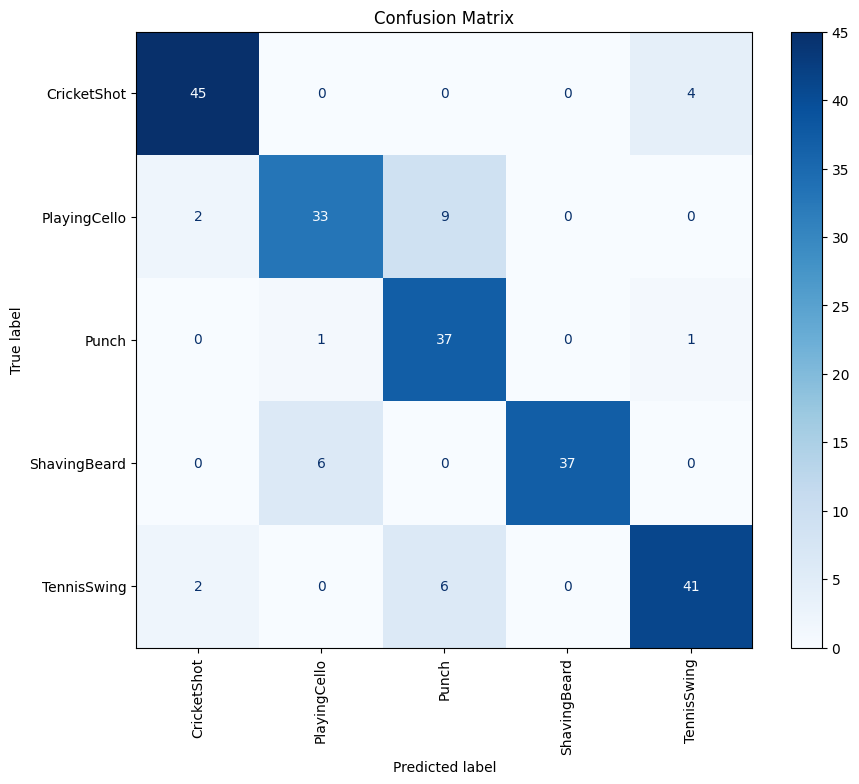

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)

# Get class labels from idx_to_label for display
display_labels = [idx_to_label[i] for i in sorted(idx_to_label.keys())]

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get video names from the test dataset
video_names = test_dataset.data_frame['video_name'].tolist()

# Map integer labels back to string labels
true_labels_str = [idx_to_label[label] for label in all_true_labels]
predicted_labels_str = [idx_to_label[label] for label in all_predicted_labels]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'video_name': video_names,
    'true_label': true_labels_str,
    'predicted_label': predicted_labels_str
})

# Add a column to indicate if the prediction was correct
comparison_df['is_correct'] = (comparison_df['true_label'] == comparison_df['predicted_label'])

print("Comparison of True vs. Predicted Labels (first 10 entries):")
display(comparison_df.head(10))

print("\nSummary of correct vs. incorrect predictions:")
display(comparison_df['is_correct'].value_counts())

In [ ]:
print("Displaying the head of the predictions_df:")
display(predictions_df.head())

print("\nDistribution of predicted labels:")
display(predictions_df['predicted_label'].value_counts())

Displaying the head of the predictions_df:


,video_path,predicted_label
0,tensor(0),CricketShot
1,tensor(0),CricketShot
2,tensor(0),CricketShot
3,tensor(0),CricketShot
4,tensor(0),CricketShot



Distribution of predicted labels:


,count
predicted_label,
Punch,52
CricketShot,49
TennisSwing,46
PlayingCello,40
ShavingBeard,37
